# Halpha Emitters S-PLUS

In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import warnings
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

2025-04-16 22:01:47.357804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-16 22:01:47.433260: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-16 22:01:47.452478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-16 22:01:47.576452: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-16 22:01:48.691575: W tensorflow/compiler/tf2

In [2]:
warnings.filterwarnings("ignore", message="n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.")

In [4]:
df = pd.read_csv("../IGAPs-emitters.csv")    

In [5]:
df

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,Umag2,e_Umag2,ClassU2,SeeingU2,MJDU2,offRAU2,offDEU2,DetIDU2,ErrBitsU2,ErrBits2
0,J194224.68+300150.1,295.602847,30.030583,65.166803,3.338740,470917-4-19310,0.025,99.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,J194313.93+301820.1,295.808058,30.305585,65.494113,3.320520,1003629-2-6703,0.026,99.0,0.99,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,J194345.00+302242.3,295.937508,30.378415,65.612932,3.259579,1009825-1-6629,NaN,1.0,0.00,1.00,...,20.99,0.08,-1.0,1.66,54654.1,-0.46,0.27,622800-1-305,0.0,2.0
3,J194345.86+302304.1,295.941069,30.384466,65.619721,3.259914,1009825-1-6406,NaN,99.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,J194342.82+302444.4,295.928401,30.412338,65.638534,3.283225,1009825-1-7250,NaN,-1.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20855,J194407.08+294655.5,296.029513,29.782092,65.134169,2.894357,921666-4-18438,0.038,1.0,0.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
20856,J194521.93+294537.4,296.341388,29.760398,65.250375,2.648831,364615-4-28219,0.033,1.0,0.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20857,J194531.79+295015.0,296.382462,29.837503,65.335068,2.656466,364615-4-25222,0.033,-1.0,1.00,0.00,...,19.27,0.03,-1.0,1.64,53904.2,0.07,-0.01,507249-2-3276,0.0,2.0
20858,J194611.49+300530.4,296.547896,30.091781,65.627252,2.659533,364618-3-20520,0.028,99.0,0.05,0.95,...,NaN,0.17,1.0,1.38,NaN,-0.23,-0.25,NaN,0.0,0.0


In [6]:
for columns in df.columns:
    print(columns)

Name
RAJ2000
DEJ2000
GLON
GLAT
SourceID
ePos
Class
pStar
pGalaxy
pNoise
imag
e_imag
imagAB
Elli
Classi
Deblendi
Saturatedi
Vignettedi
Traili
Truncatedi
BadPixi
MJDi
Seeingi
DetIDi
offRAi
offDEi
Hamag
e_Hamag
HamagAB
EllHa
ClassHa
DeblendHa
SaturatedHa
VignettedHa
TrailHa
TruncatedHa
BadPixHa
MJDHa
SeeingHa
DetIDHa
offRAHa
offDEHa
rImag
e_rImag
rImagAB
EllrI
ClassrI
DeblendrI
SaturatedrI
VignettedrI
TrailrI
TruncatedrI
BadPixrI
MJDrI
SeeingrI
DetIDrI
rUmag
e_rUmag
rUmagAB
EllrU
ClassrU
DeblendrU
SaturatedrU
VignettedrU
TrailrU
TruncatedrU
BadPixrU
MJDrU
SeeingrU
DetIDrU
offRArU
offDErU
gmag
e_gmag
gmagAB
Ellg
Classg
Deblendg
Saturatedg
Vignettedg
Trailg
Truncatedg
BadPixg
maskg
MJDg
Seeingg
DetIDg
offRAg
offDEg
Umag
e_Umag
EllU
ClassU
DeblendU
SaturatedU
VignettedU
TrailU
TruncatedU
BadPixU
MJDU
SeeingU
DetIDU
offRAU
offDEU
brightN
deblend
saturated
nBands
errBits
nObsI
nObsU
FieldIDI
FieldIDU
FieldGradeI
FieldGradeU
emitter
variable
SourceID2
imag2
e_imag2
Classi2
Seeingi2
MJDi2
offRAi

In [7]:
# Filtra fuentes con emitter = 1 o 2 y calidad aceptable
mask = (
       df['SaturatedHa'] == 0) & \
       (df['DeblendHa'] == 0) & \
       (df['BadPixHa'] == 0) & \
       (df['errBits'] == 0)

In [8]:
df_filtered = df[mask].copy()
len(df_filtered)

17413

In [9]:
# Calcula colores clave
df_filtered['r_Ha'] = df_filtered['rImag'] - df_filtered['Hamag']  # Exceso en Hα
df_filtered['r_i'] = df_filtered['rImag'] - df_filtered['imag']     # Color óptico
df_filtered['g_r'] = df_filtered['gmag'] - df_filtered['rImag']     # Azul vs rojo
df_filtered['U_g'] = df_filtered['Umag'] - df_filtered['gmag']      # UV vs óptico
df_filtered['Ha_i'] = df_filtered['Hamag'] - df_filtered['imag']    # Hα vs continuo
df_filtered['g_i'] = df_filtered['gmag'] - df_filtered['imag']     
# Calcula Hα - g (Hamag - gmag)
df_filtered['Ha_g'] = df_filtered['Hamag'] - df_filtered['gmag']


In [10]:
# Variabilidad (dos opciones)
df_filtered['var_r'] = df_filtered['rImag'] - df_filtered['rUmag']  # Diferencia directa
df_filtered['var_flag'] = df_filtered['variable']                   # Usar el flag 0/1

In [11]:
variables = [
    'r_Ha',      # Exceso en Hα (prioritario)
    'r_i',       # Color óptico
    'g_r',       # Azul-rojo
    'U_g',       # UV-óptico (clave para objetos calientes)
    'Ha_i',      # Refuerza exceso Hα
    'var_r'      # Variabilidad (o 'var_flag' si prefieres binario)
]


In [12]:
# Elimina filas con NaN (si hay magnitudes faltantes)
df_clean = df_filtered[variables].dropna()

df_colors = df_clean[variables].values

In [13]:
df_colors

array([[ 0.47,  0.38,  0.37,  0.56, -0.09,  0.1 ],
       [ 0.76,  0.64,  0.96,  0.99, -0.12,  0.04],
       [ 0.56,  0.59,  1.24,  1.22,  0.03,  0.04],
       ...,
       [ 0.6 ,  0.68,  1.1 ,  1.07,  0.08,  0.  ],
       [ 0.73,  0.77,  1.31,  0.84,  0.04, -0.07],
       [ 0.51,  0.64,  1.08,  0.87,  0.13,  0.01]])

# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [14]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [15]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

#### Try UMAP

In [16]:
num_components = 2
reducer = umap.UMAP(n_neighbors=50, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

Visualize the cumulative explained variance ratio:

In [17]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

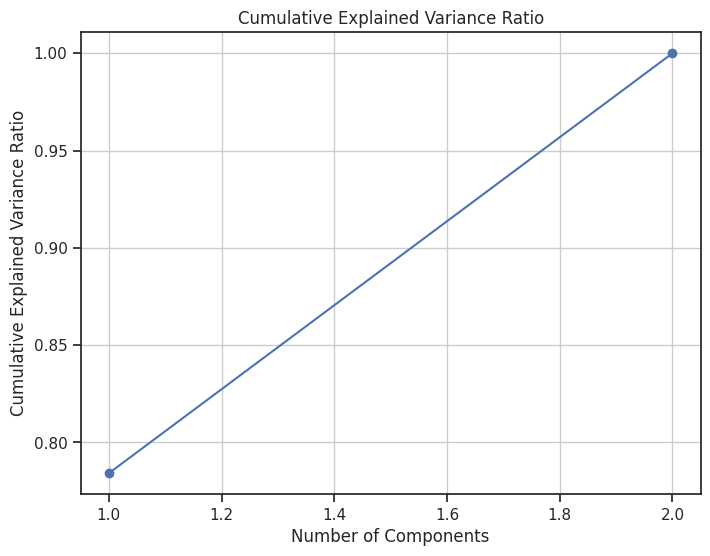

In [18]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [19]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2
0,13.689093,5.728087
1,9.998664,7.861566
2,9.182487,11.190501
3,11.681879,9.572234
4,12.073118,8.370962
...,...,...
8703,5.298390,8.941683
8704,12.170063,9.425340
8705,9.817537,10.371339
8706,8.396626,8.329840


/tmp/ipykernel_85871/1889642369.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))
/tmp/ipykernel_85871/1889642369.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_df["PC1"], umap_df["PC2"],


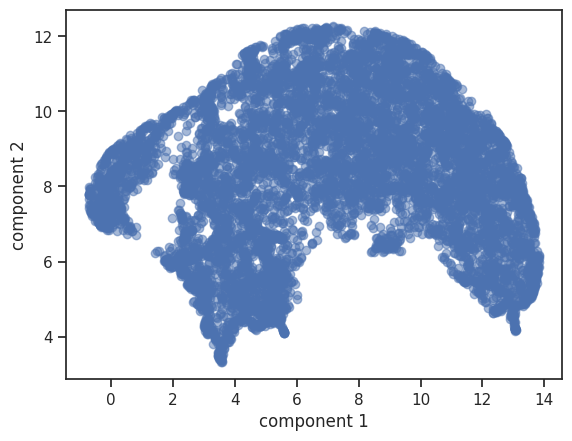

In [20]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
              # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

/tmp/ipykernel_85871/1633483013.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], cmap="nipy_spectral", s=100)


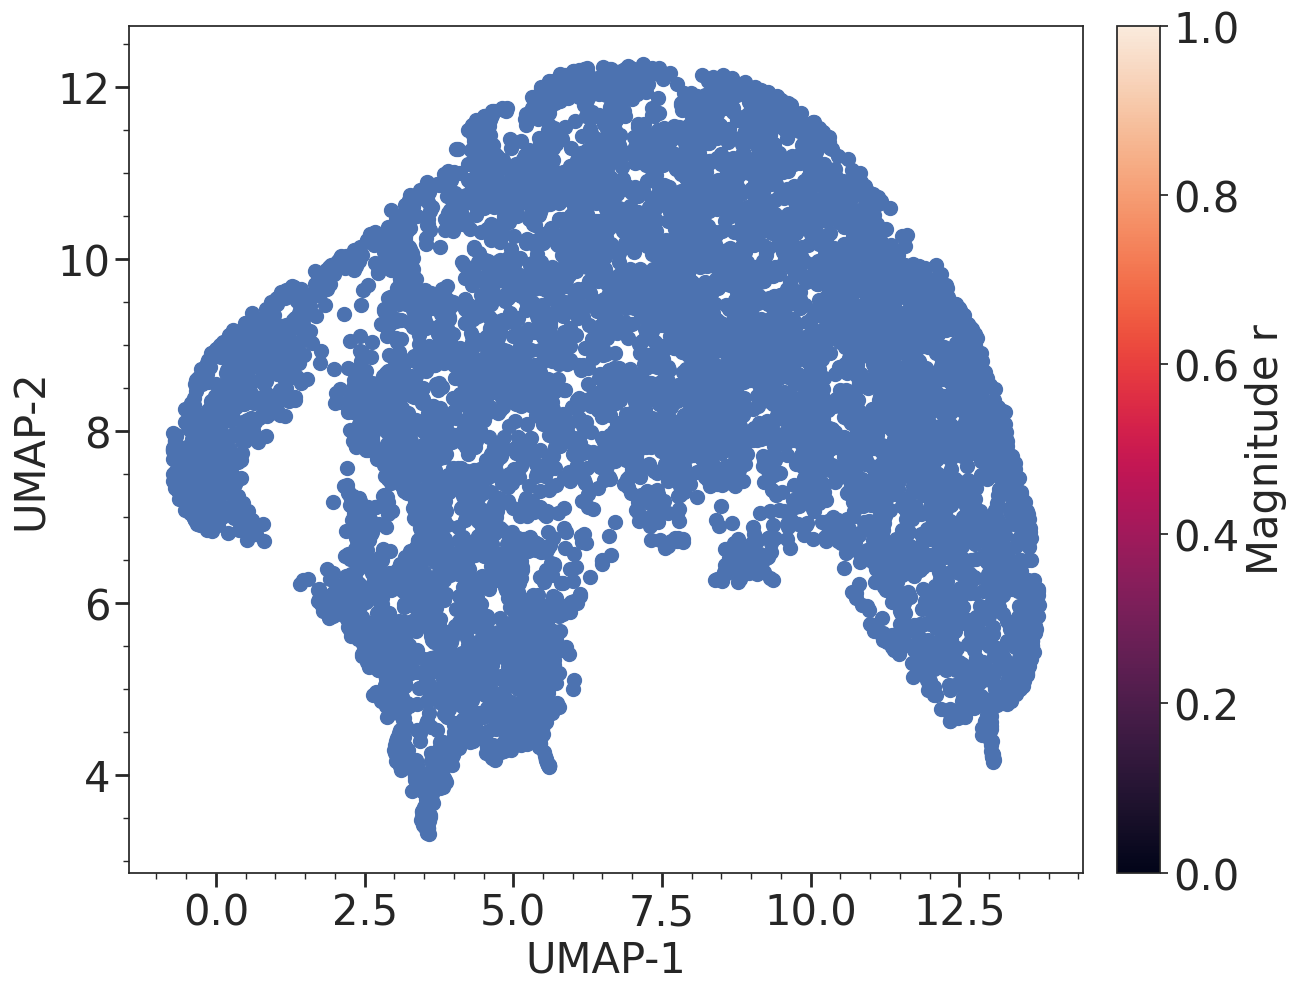

In [21]:
from matplotlib.ticker import MultipleLocator, NullFormatter

# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    plt.xlabel("UMAP-1", fontsize=30)
    plt.ylabel("UMAP-2", fontsize=30)
    plt.tick_params(axis='x', labelsize=30, width=2, length=10)  # Adjusting width of tick marks
    plt.tick_params(axis='y', labelsize=30, width=2, length=10)  # Adjusting width of tick marks

    # Create a scatter plot
    sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], cmap="nipy_spectral", s=100)
    
    # Add minor tick locators without showing the minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label("Magnitude r", fontsize=30)  # Provide a label for the colorbar
    cbar.ax.tick_params(labelsize=30)  # Adjust the size of the tick labels

#plt.savefig("../Figs/umap_splus.pdf")

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

# print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 100. We try then: 
But first try this min_samples=15, min_cluster_size=60

In [88]:
clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=30, 
                             prediction_data=True, gen_min_span_tree=True)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [89]:

clusterer.fit(X_trans)
labels = clusterer.labels_
len(labels)

8708

In [90]:
clusterer.metric

'euclidean'

In [91]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_cluster4 = list(labels).count(4)
n_noise_ = list(labels).count(-1)


In [92]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of cluster points 4: %d' % n_cluster4)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 53
Estimated number of cluster points 0: 63
Estimated number of cluster points 1: 651
Estimated number of cluster points 2: 41
Estimated number of cluster points 3: 140
Estimated number of cluster points 4: 116
Estimated number of noise points: 2980


<Axes: >

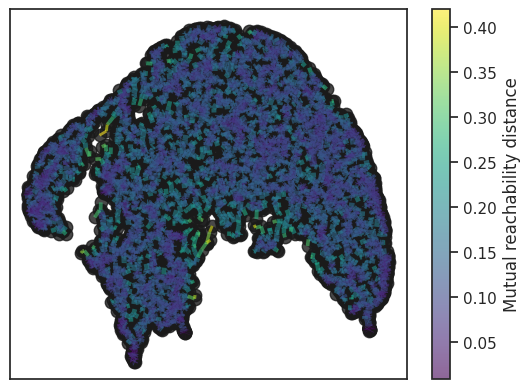

In [93]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<Axes: ylabel='distance'>

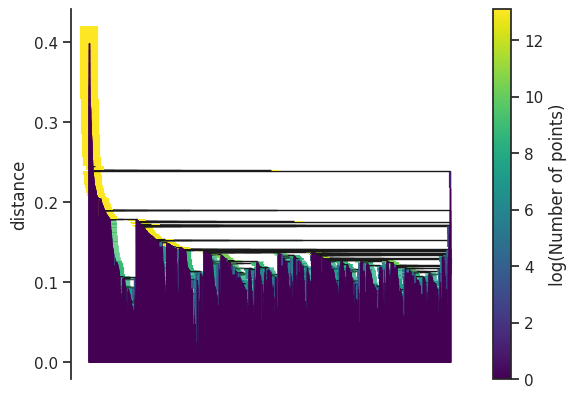

In [94]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<Axes: ylabel='$\\lambda$ value'>

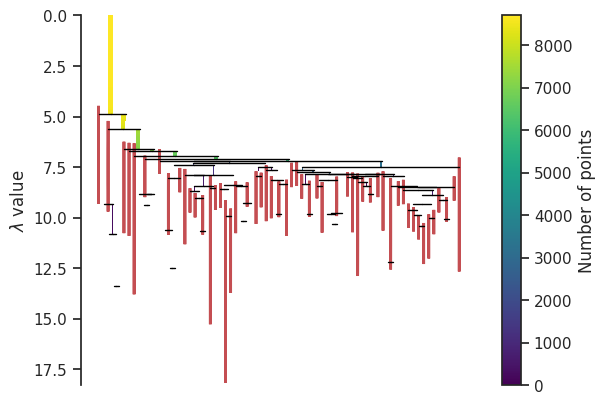

In [95]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

<Axes: xlabel='PC1', ylabel='PC2'>

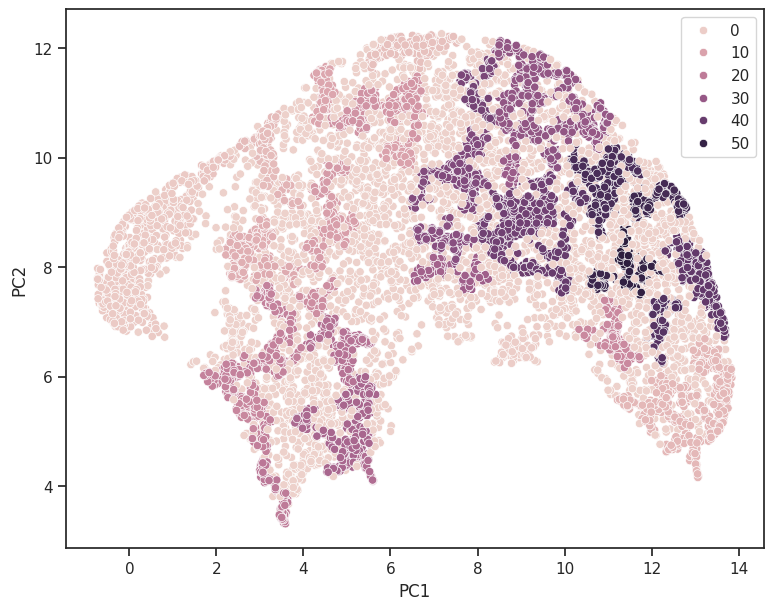

In [96]:

plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

In [59]:
# Concatenat the original claen table with the umap results
df_cleanErr.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_cleanErr, umap_df], axis=1)
df_cleanErr_umap

NameError: name 'df_cleanErr' is not defined

Create the tables for each clase

In [ ]:
df_cleanErr_umap["Label"] = labels

In [ ]:
df_cleanErr_umap

**Preliminary conlusions**
Wiht the parameters recomended by the Silhouette HDBSCAM fin two group...

In [ ]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")

In [ ]:
# Define the directory where you want to save the CSV files
directory = '../Class_main_unique/'

In [ ]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_noise.csv'
    else:
        filename = f'Halpha_emitter_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)